In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import uproot4
import pandas as pd

In [3]:
#file_std = uproot4.open("E:/run1_sys/standard_run1.root")
file_std = uproot4.open("E:/run3_sys/standard_run3.root")
tree_std = file_std["singlephotonana;1/vertex_tree;1"]
pot_std= file_std["singlephotonana;1/pot_tree;1"]
#pot_exp_R1 = 2e+20
pot_exp_R1 = 5e+20


pot_number_std = pot_std['POT'].array(library='ak')
shower_number_std = tree_std['reco_asso_showers'].array(library="ak")
track_number_std = tree_std['reco_asso_tracks'].array(library='ak')
shwer_nu_check_std = tree_std['mctruth_nu_pdg'].array(library='ak')
shwer_NC_CC_check_std = tree_std['mctruth_cc_or_nc'].array(library='ak')
shwer_energy_std = tree_std['reco_shower_energy_max'].array(library='ak')

pot_cv=np.sum(pot_number_std)
Pot=pot_exp_R1 / pot_cv

In [4]:
enu_NC = []
munu_NC = []
enu_CC = []
munu_CC = []

enu_NC_CUT1 = []
munu_NC_CUT1 = []
enu_CC_CUT1 = []
munu_CC_CUT1 = []

enu_NC_CUT2 = []
munu_NC_CUT2 = []
enu_CC_CUT2 = []
munu_CC_CUT2 = []

index=0
for i,j,m,n in zip(shwer_NC_CC_check_std,shwer_nu_check_std,shower_number_std,track_number_std):
    if(m == 1 and n ==0):
        if(i == 1):
            if(j == 14 or j == -14):
                energy = shwer_energy_std[index][0]
                enu_NC_CUT1.append(energy)
            else:
                energy = shwer_energy_std[index][0]
                munu_NC_CUT1.append(energy)
        if(i == 0):
            if(j == 14 or j == -14):
                energy = shwer_energy_std[index][0]
                enu_CC_CUT1.append(energy)
            else:
                energy = shwer_energy_std[index][0]
                munu_CC_CUT1.append(energy)
    index+=1

index=0
for i,j,m,n in zip(shwer_NC_CC_check_std,shwer_nu_check_std,shower_number_std,track_number_std):
    if(m >= 1 and n ==0):
        if(i == 1):
            if(j == 14 or j == -14):
                energy = shwer_energy_std[index][0]
                enu_NC_CUT2.append(energy)
            else:
                energy = shwer_energy_std[index][0]
                munu_NC_CUT2.append(energy)
        if(i == 0):
            if(j == 14 or j == -14):
                energy = shwer_energy_std[index][0]
                enu_CC_CUT2.append(energy)
            else:
                energy = shwer_energy_std[index][0]
                munu_CC_CUT2.append(energy)
    index+=1

for i,j,m in zip(shwer_NC_CC_check_std,shwer_nu_check_std,shwer_energy_std):
    if(i == 1):
        if(j == 14 or j == -14):
            for energy in m:
                enu_NC.append(energy)
        else:
            for energy in m:
                munu_NC.append(energy)
    if(i == 0):
        if(j == 14 or j == -14):
            for energy in m:
                enu_CC.append(energy)
        else:
            for energy in m:
                munu_CC.append(energy)
NCe=np.array(enu_NC)/1000
NCmu=np.array(munu_NC)/1000
CCe=np.array(enu_CC)/1000
CCmu=np.array(munu_CC)/1000

NCe1=np.array(enu_NC_CUT1)/1000
NCmu1=np.array(munu_NC_CUT1)/1000
CCe1=np.array(enu_CC_CUT1)/1000
CCmu1=np.array(munu_CC_CUT1)/1000

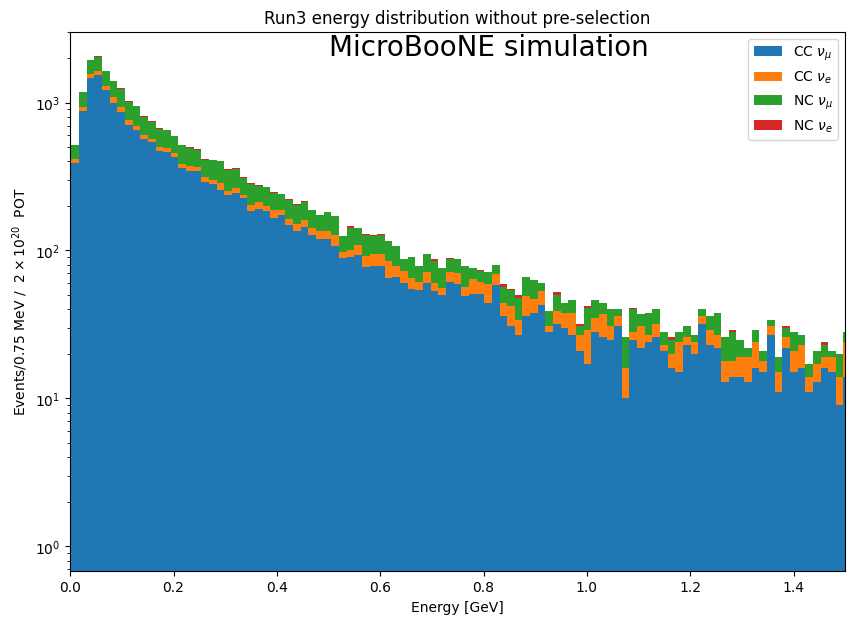

In [5]:
tip=[r'CC $\nu_{\mu}$',r'CC $\nu_e$',r'NC $\nu_{\mu}$',r'NC $\nu_e$']
plt.figure(figsize=(10,7))
plt.xlabel('Energy [GeV]')
plt.ylabel(r'Events/0.75 MeV /  $2 \times 10^{20}$  POT')
plt.title('Run3 energy distribution without pre-selection')
plt.xlim(0.,1.5)
plt.text(0.5,2100,'MicroBooNE simulation',fontsize=20)
plt.hist([CCe*Pot,CCmu*Pot,NCe*Pot,NCmu*Pot],label=tip,stacked='ture',bins=2000,log=True)
plt.legend()
plt.show()

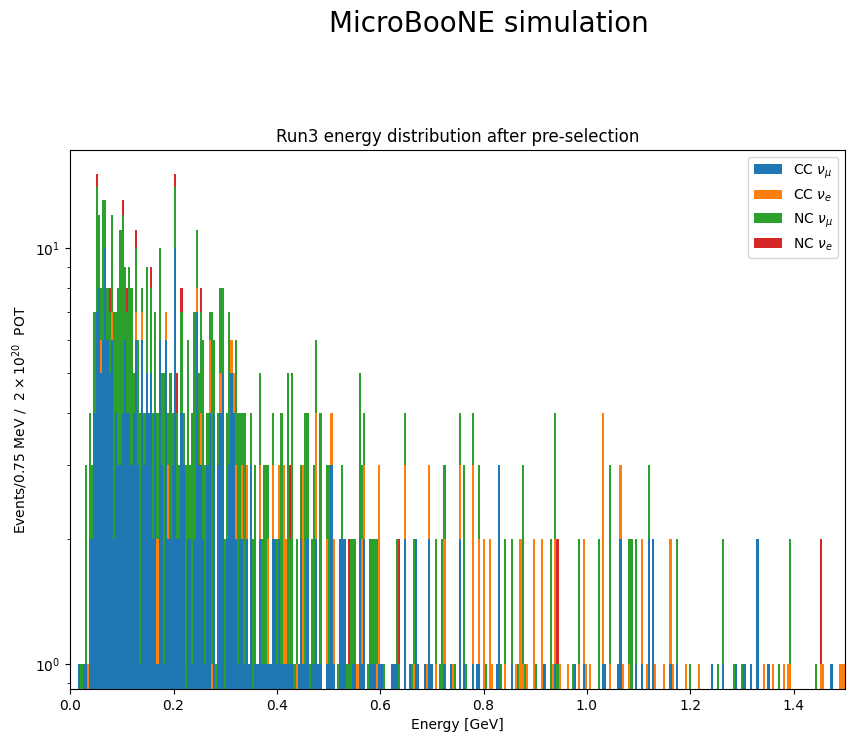

In [8]:
tip=[r'CC $\nu_{\mu}$',r'CC $\nu_e$',r'NC $\nu_{\mu}$',r'NC $\nu_e$']
plt.figure(figsize=(10,7))
plt.hist([CCe1*Pot,CCmu1*Pot,NCe1*Pot,NCmu1*Pot],label=tip,stacked='ture',bins=1000, log=True)
plt.xlabel('Energy [GeV]')
plt.ylabel(r'Events/0.75 MeV /  $2 \times 10^{20}$  POT')
plt.title('Run3 energy distribution after pre-selection')
plt.xlim(0,1.5)
plt.text(0.5,33,'MicroBooNE simulation',fontsize=20)
plt.legend()
plt.show()

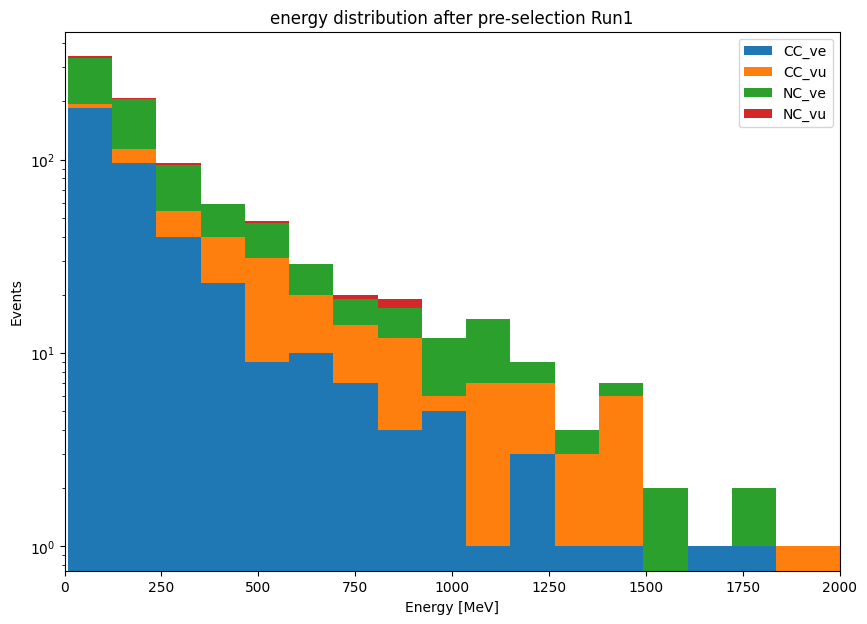

In [27]:
tip=['CC_ve','CC_vu','NC_ve','NC_vu']
data_nu=[enu_CC_CUT1,munu_CC_CUT1,enu_NC_CUT1,munu_NC_CUT1]
plt.figure(figsize=(10,7))
plt.hist(data_nu,label=tip,stacked='ture',bins=20,log=True)
plt.xlabel('Energy [MeV]')
plt.ylabel('Events')
plt.title('energy distribution after pre-selection Run1')
plt.yscale=('log')
plt.xlim(0.,2000.)

plt.legend()
plt.show()

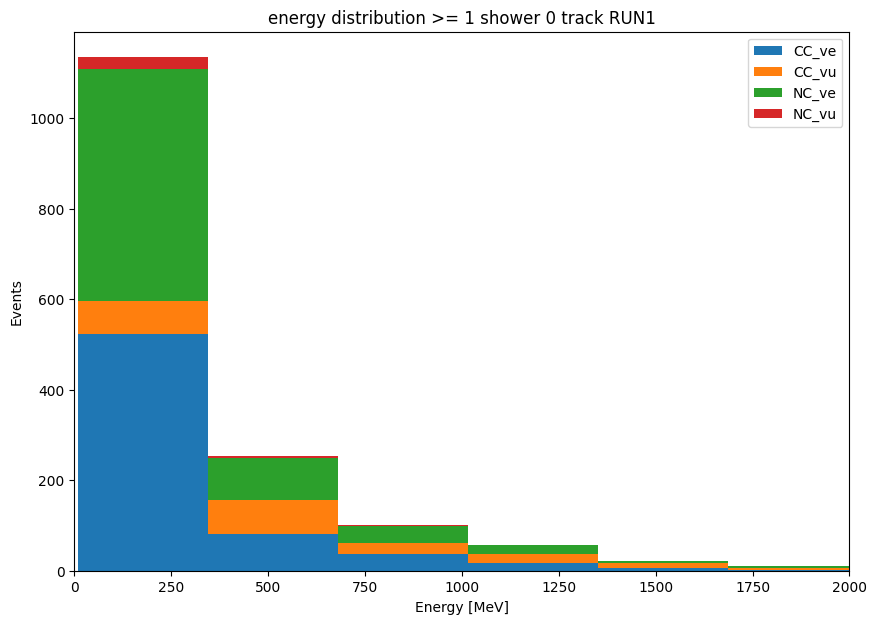

In [28]:
tip=['CC_ve','CC_vu','NC_ve','NC_vu']
data_nu=[enu_CC_CUT2,munu_CC_CUT2,enu_NC_CUT2,munu_NC_CUT2]
plt.figure(figsize=(10,7))
plt.hist(data_nu,label=tip,stacked='ture',bins=20)
plt.xlabel('Energy [MeV]')
plt.ylabel('Events')
plt.title('energy distribution >= 1 shower 0 track RUN1')
plt.xlim(0.,2000.)
plt.legend()
plt.show()